## Import Libraries

In [4]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import torch
from dncnn import *

## Load Colour Blind Model

In [33]:
n_channels = 3 # 1 for grayscale, 3 for color
nb = 20 # 17 for fixed noise level, 20 for blind
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
noise_level_img = 15                 # noise level for noisy image
noise_level_model = noise_level_img  # noise level for model

def dn_cnn_filtered_residual(model, image, n_channels=n_channels):
    if is_path(image):
        image = imread_uint(image, n_channels=n_channels)
    img_L = uint2single(image)
    img_L = single2tensor4(img_L)
    img_L = img_L.to(device)
    img_E = model(img_L)
    img_N = img_L - img_E
    img_N = tensor2uint(img_N)
    return img_N

model = DnCNN(in_nc=n_channels, out_nc=n_channels, nc=64, nb=nb, act_mode='R')
model.load_state_dict(torch.load('./dncnn_color_blind.pth'), strict=True)
model = model.to(device)
model.eval()

DnCNN(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace=True)
    (18): Conv2d(64, 64, kernel_size

[]

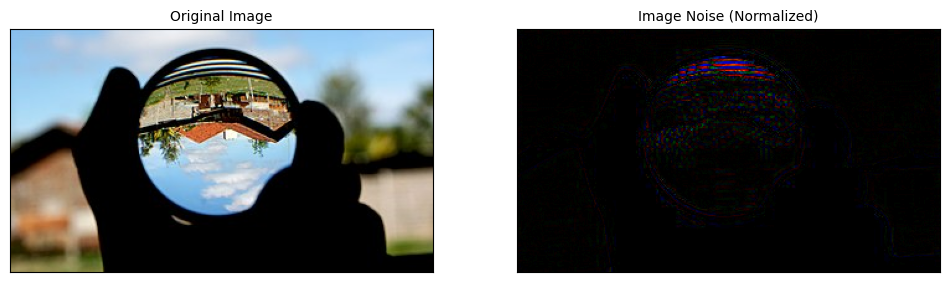

In [35]:
img = imread_uint('./random_img.jpg')
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img)
ax.set_title('Original Image', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.imshow(normalize_image(dn_cnn_filtered_residual(model, img)))
ax.set_title('Image Noise (Normalized)', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])

## Load Gray Fixed Model

In [26]:
n_channels = 1 # 1 for grayscale, 3 for color
nb = 17 # 17 for fixed noise level, 20 for blind

def dn_cnn_filtered_residual(model, image, n_channels=n_channels):
    if is_path(image):
        image = imread_uint(image, n_channels=n_channels)
    img_L = uint2single(expand_dim(image))
    img_L = single2tensor4(img_L)
    img_L = img_L.to(device)
    img_E = model(img_L)
    img_N = img_L - img_E
    img_N = tensor2uint(img_N)
    return img_N

model = DnCNN(in_nc=n_channels, out_nc=n_channels, nc=64, nb=nb, act_mode='R')
model.load_state_dict(torch.load('./dncnn_15.pth'), strict=True)
model = model.to(device)
model.eval()

DnCNN(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace=True)
    (18): Conv2d(64, 64, kernel_size

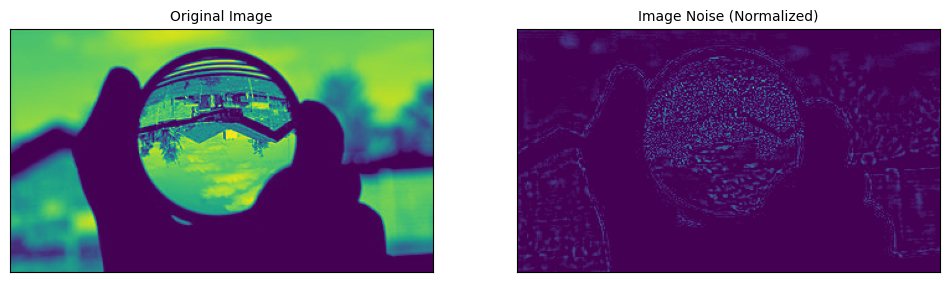

In [30]:
img = cv2.cvtColor(imread_uint('./random_img.jpg'), cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img)
ax.set_title('Original Image', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.imshow(normalize_image(dn_cnn_filtered_residual(model, img)))
ax.set_title('Image Noise (Normalized)', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()